# 1. Estudio función pulmonar (Regresión)

Estudio que investiga si fumar afecta la función pulmonar en niños. Se realizaron mediciones de la función pulmonar en 654 niños que asistieron a un chequeo de rutina en una clínica pediátrica en particular. Los niños participantes en este estudio fueron preguntados si eran fumadores actuales.

El conjunto de datos fev.txt contiene información sobre 654 niños, incluyendo edad, altura, sexo, FEV y si cada niño fuma o no. Cada fila corresponde a una visita a la clínica, y los datos faltantes se indican como NA.

FUENTE: https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fwww.emersonstatistics.com%2Fdatasets%2Ffev.doc&wdOrigin=BROWSELINK

### Reporte descriptivo de los datos

In [205]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

pacientes = pd.read_csv('C:\\Users\\monic\\OneDrive\\DATASCIENCE - UCM\\07_MINERIADATOS_20230109\\DATOS\\FEV_data.csv')
pacientes


,seqnbr,subjid,age,fev,height,sex,smoke
0,1,301,9,1.708,57.0,2,2
1,2,451,8,1.724,67.5,2,2
2,3,501,7,1.720,54.5,2,2
3,4,642,9,1.558,53.0,1,2
4,5,901,9,1.895,57.0,1,2
5,6,1701,8,2.336,61.0,2,2
6,7,1752,6,1.919,58.0,2,2
7,8,1753,6,1.415,56.0,2,2
8,9,1901,8,1.987,58.5,2,2
9,10,1951,9,1.942,60.0,2,2


In [206]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


Observamos que no hay ningún valor perdido. Vamos a hacer nunique() para ver si las variables son categóricas o continuas.

In [207]:
pacientes.nunique()


seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

Vemos que tanto sex como smoke son continuas porque tienen menos de 10 registros diferentes, vamos a convertirlas en variables categóricas.

In [208]:
to_factor = list(pacientes.loc[:,pacientes.nunique() <= 10]);  
pacientes[to_factor] = pacientes[to_factor].astype('category')

In [209]:
#Comprobamos que efectivamente se han pasado a categóricas tanto sex como smoke.
pacientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


In [210]:
pacientes.describe()


,seqnbr,subjid,age,fev,height
count,654.00000,654.000000,654.000000,654.000000,654.000000
mean,327.50000,37169.571865,9.931193,2.636780,61.143578
std,188.93782,23690.860350,2.953935,0.867059,5.703513
min,1.00000,201.000000,3.000000,0.791000,46.000000
25%,164.25000,15811.000000,8.000000,1.981000,57.000000
50%,327.50000,36071.000000,10.000000,2.547500,61.500000
75%,490.75000,53638.500000,12.000000,3.118500,65.500000
max,654.00000,90001.000000,19.000000,5.793000,74.000000


Hacemos otro describe() para las categóricas porque no tiene sentido para este tipo de dato calcular medidas ni de dispersión ni de centralización de estas variables.

In [211]:
pacientes.describe(exclude=np.number)

,sex,smoke
count,654,654
unique,2,2
top,1,2
freq,336,589


In [212]:
#Importamos paquetes para hacer histograma y boxplot.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(x=data, ax=ax_box2)
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    plt.show()


In [213]:
# Muestra las categóricas.
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        return(fig)
  


Cont


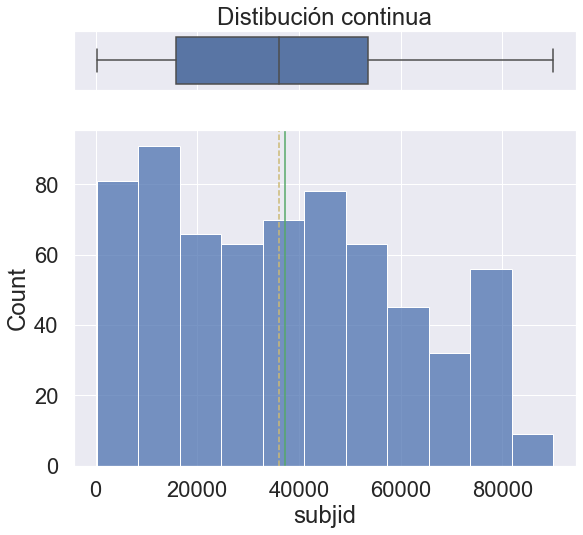

Cont


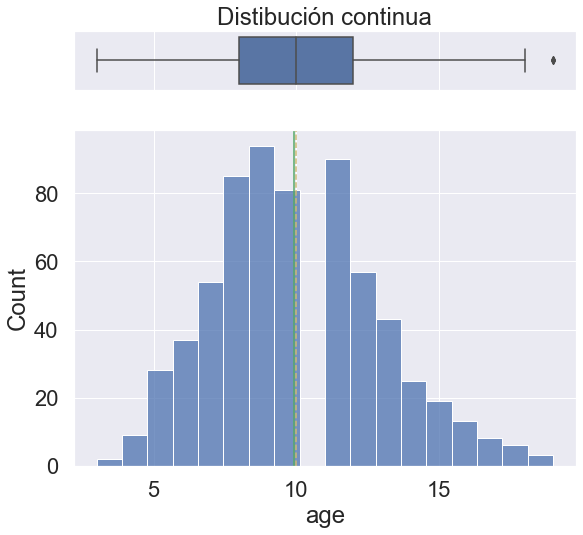

Cont


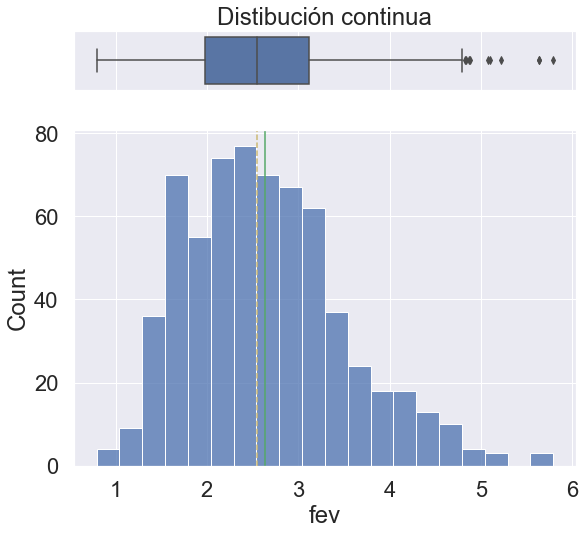

Cont


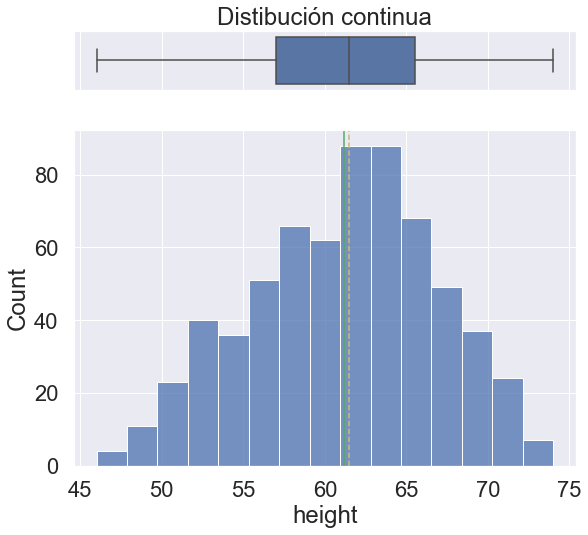

Cat


Cat


subjid    None
age       None
fev       None
height    None
sex       None
smoke     None
dtype: object

In [214]:
def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col).show()
        
pacientes.iloc[:,1:9].apply(plot)

<AxesSubplot:>

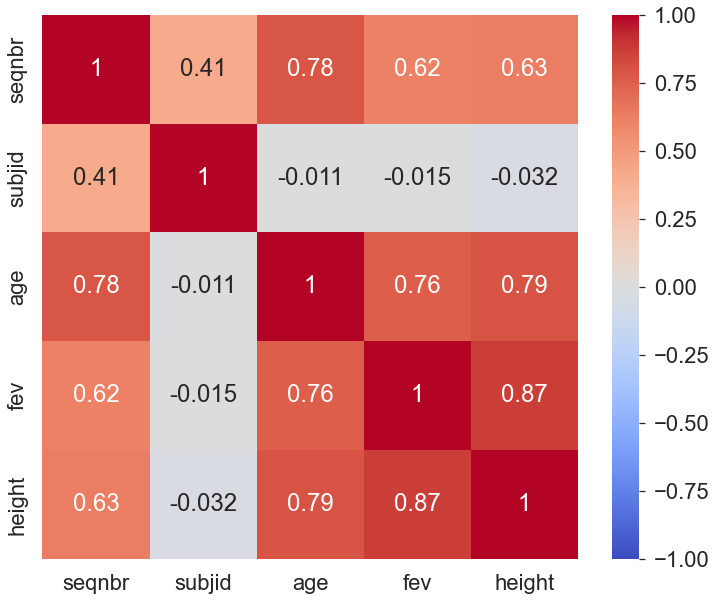

In [215]:
import seaborn as sns
sns.heatmap(pacientes.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Con esta matriz podemos observar las correlaciones de los predictores con la variable objetivo fev. Se observa que están altamente correlacionados tanto height como age ya que presentan una correlación próxima a 1.

#### COMENTARIOS GENERALES

Se trata de un dataset con 654 entradas y 6 variables a analizar. Todas son variables continuas a excepción de `sex` y `smoke` que son variables categóricas (las hemos convertido pues toman tan solo 2 valores diferentes, lo vemos con la función nunique()). La variable `Age` se podría convertir en categórica porque toma 17 valores diferentes pero vamos a establecer un umbral de 10 por lo que no vamos a convertirla.

En cuanto a las distribuciones de las variables continuas parecen normales porque el histograma presenta la forma de la campana de Gauss Jordan. Y, respecto a las variables categóricas observamos que hay prácticamente tantos hombres como mujeres pero la variable `smoke` no presenta homogeneidad en cuanto a la distribución de las dos variables. 

Como ya comentamos se trata de un dataset bien depurado que no presenta valores missing, y además, tampoco observamos valores atípicos preocupantes (lo vemos con describe()).

Bajo este primer análisis observamos que tanto age como height pueden ser buenos predictores porque presentan alta correlación pero tendremos que ver el aporte que realizan al R2, p-valores etc.

De primeras podríamos descartar las variables `seqnbr` que es el número del caso y `subjid` que es el número de identificación. Respecto al resto de variables, veremos próximamente si presentan buena capacidad predictiva y decidimos incluirlas en el modelo o no.

In [216]:
datapacientes = pacientes.drop(['seqnbr'], axis=1)

In [217]:
pacientesvar = datapacientes.drop(['subjid'], axis=1)

In [218]:
pacientesvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     654 non-null    int64   
 1   fev     654 non-null    float64 
 2   height  654 non-null    float64 
 3   sex     654 non-null    category
 4   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(1)
memory usage: 17.0 KB


### Cálculo Modelo Regresión

Calculamos el modelo de regresión lineal mediante partición training-test. Tenemos la función train_test_split de sklearn que realiza la partición estratificada por la variable objetivo (para mantener proporciones o distribución) con los tamaños dados y devuelve los objetos training (X de predictores e y de respuesta) y test (X de predictores e y de respuesta). 

In [219]:
#Separamos la variable objetivo y creamos una nueva variable sin ella para pasársela al train_test_split
varObj = pacientesvar.fev
imputPacientes = pacientesvar.drop(['fev'], axis=1)

In [220]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(imputPacientes, varObj, test_size=0.2, random_state=42)


print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (523, 4) (523,)
Testing dataset shape: (131, 4) (131,)


Se observa que de 654 registros, 523 son training y 131 son test. El training supone un 80% y el test un 20%,  buenas proporciones.

In [221]:
# Genero el train con la objetivo dentro
data_train = X_train.join(y_train)

In [222]:
# MODELO COMPLETO
def ols_formula(df, dependent_var, *excluded_cols): #df: con todas las variables + COmo se llama la objet + exclusión column
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var) #quita variables
    for col in excluded_cols: #elimina excluidas
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns) #retorna variable dependiente y la concatenación de las columnas no excluidas

# Aplicamos formula al modelo completo
form=ols_formula(data_train,'fev')
form

'fev ~ age + height + sex + smoke'

In [223]:
from statsmodels.formula.api import ols 

modeloC = ols(form,data=data_train).fit()
modeloC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     423.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.09e-161
Time:                        13:00:45   Log-Likelihood:                -281.13
No. Observations:                 523   AIC:                             572.3
Df Residuals:                     518   BIC:                             593.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3576      0.271    -16.067      0.000      -4.890      -3.825
sex[T.2]      -0.1511      0.038     -4.028      0.000      -0.225      -0.077
smoke[T.2]     0.0652      0.066      0.983      0.326      -0.065       0.196
age            0.0632      0.011      5.678      0.000       0.041       0.085
height         0.1041      0.005     19.150      0.000       0.093       0.115
==============================================================================
Omnibus:                       11.617   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.038
Skew:                           0.178   Prob(JB):                     0.000200
Kurtosis:                       3.810   Cond. No.                         932.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared y Adj. R-squared: El coeficiente de determinación (R-squared) es 0.766, lo que significa que aproximadamente el 76.6% de la variabilidad en la variable dependiente (fev) se explica por las variables independientes en el modelo. El R-squared ajustado (Adj. R-squared) tiene en cuenta el número de predictores en el modelo y es 0.764.

- F-statistic y Prob (F-statistic): El valor del estadístico F es 423.4, con una probabilidad asociada extremadamente baja (1.09e-161). Esto sugiere que al menos una de las variables explicativas en el modelo es significativa en la predicción de la variable dependiente.

- Coeficientes: Los coeficientes para las variables independientes son:

    `Intercepto`: -4.3576
    
    `Sexo` (sex[T.2]): -0.1511
    
    `Fumar` (smoke[T.2]): 0.0652
    
    `Edad` (age): 0.0632
    
    `Altura` (height): 0.1041

- P>|t|: Estos valores representan la probabilidad de que los coeficientes estimados sean igual a cero (hipótesis nula). Valores pequeños (menores que 0.05) indican que los coeficientes son significativamente diferentes de cero.

    1. El intercepto, `sexo` (sex[T.2]), `edad` (age), y `altura` (height) tienen valores p muy bajos, lo que sugiere que son significativamente diferentes de cero.
    2. Fumar (smoke[T.2]) tiene un valor p más alto (0.326), lo que indica que no es significativo a un nivel de significancia del 5%.

- Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis: Estos son diagnósticos de la calidad del modelo. Un Omnibus significativo (0.003) sugiere que el modelo no se ajusta perfectamente a los datos. El Durbin-Watson de 2.092 indica una posible autocorrelación. Jarque-Bera (17.038) prueba la normalidad de los residuos, y valores bajos podrían indicar desviaciones de la normalidad.


No se trata de un modelo sobreparametrizado pero por Principio de Parsimonia buscaremos un modelo más simple con la misma o más capacidad predictiva, si es posible.

Vamos a comprobar la importancia de la variables respecto al R2.

In [224]:
from relativeImp import relativeImp
names=X_train.columns.tolist()[0:]


df_results = relativeImp(X_train.join(y_train), outcomeName = 'fev', driverNames = names) 

#Ordenamos los valores
df_results.sort_values(by='normRelaImpt', ascending=False)

,driver,rawRelaImpt,normRelaImpt
1,height,0.443669,57.937958
0,age,0.277787,36.275651
2,sex,0.024235,3.164859
3,smoke,0.020075,2.621533


In [225]:
px.bar(df_results,x='normRelaImpt',y='driver',title='Importancia relativa por aportación al R2').update_yaxes(categoryorder="total ascending").show()

Podemos observar como `height` y `age` son las variables que más aportan al modelo. Veamos el modelo eliminando variables que sean poco significativas mediante el proceso backward. Eliminamos primero `smoke` y después `sex`.

In [226]:
from statsmodels.formula.api import ols

modeloC2 = ols('fev ~ height + age + sex',data=data_train).fit()
modeloC2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     564.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          6.86e-163
Time:                        13:00:45   Log-Likelihood:                -281.61
No. Observations:                 523   AIC:                             571.2
Df Residuals:                     519   BIC:                             588.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2829      0.260    -16.450      0.000      -4.794      -3.771
sex[T.2]      -0.1540      0.037     -4.117      0.000      -0.227      -0.081
height         0.1043      0.005     19.223      0.000       0.094       0.115
age            0.0601      0.011      5.629      0.000       0.039       0.081
==============================================================================
Omnibus:                       11.573   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.840
Skew:                           0.155   Prob(JB):                     0.000134
Kurtosis:                       3.850   Cond. No.                         892.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos que el R cuadrado prácticamente se mantiene invariable y por Principio de Parsimonia preferimos este modelo porque es más simple con similar capacidad predictiva. Eliminaremos ahora la variable `sex`.

In [227]:
form2 = 'fev ~ height + age'
modeloC2 = ols('fev ~ height + age',data=data_train).fit()
modeloC2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     812.9
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          8.87e-161
Time:                        13:00:45   Log-Likelihood:                -290.02
No. Observations:                 523   AIC:                             586.0
Df Residuals:                     520   BIC:                             598.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5960      0.253    -18.181      0.000      -5.093      -4.099
height         0.1095      0.005     20.417      0.000       0.099       0.120
age            0.0523      0.011      4.900      0.000       0.031       0.073
==============================================================================
Omnibus:                       18.099   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.130
Skew:                           0.231   Prob(JB):                     1.74e-07
Kurtosis:                       4.103   Cond. No.                         852.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se aprecia una pequeña bajada del R2 pero nos quedaremos con este modelo porque es muy simple y la capacidad predictiva apenas se ve afectada pues tanto sex como smoke no son muy significativos en cuanto a R2. Nos quedamos con este modelo por principio de Parsimonia.

Ajustamos el modelo C2 de regresión lineal haciendo interacción entre `age` y `height` porque son los únicos predictores con los que nos quedamos después de haber comprobado que son los que más capacidad predictiva aportan al modelo.

In [228]:
form3 = 'fev ~ age*height'

modeloC3 = ols(form3,data=data_train).fit()
modeloC3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     622.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.72e-171
Time:                        13:00:45   Log-Likelihood:                -261.65
No. Observations:                 523   AIC:                             531.3
Df Residuals:                     519   BIC:                             548.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4138      0.593     -0.698      0.485      -1.579       0.751
age           -0.4306      0.063     -6.789      0.000      -0.555      -0.306
height         0.0410      0.010      4.013      0.000       0.021       0.061
age:height     0.0077      0.001      7.712      0.000       0.006       0.010
==============================================================================
Omnibus:                       17.104   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.858
Skew:                          -0.053   Prob(JB):                     6.02e-09
Kurtosis:                       4.314   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se observa como sube la capacidad predictiva al tener en  cuenta las interacciones entre `edad` y `height` respecto al modelo completo por lo que, a priori, es mejor modelo que el anterior. No obstante, el R2 siempre va a aumentar cuando introducimos nuevas variables al modelo por lo que debemos mirar el R2 ajustado y el criterio de AKAIKE que penaliza la adición de nuevos predictores. En este caso el R2 ajustado se incrementa y el AIC es menor a pesar de tener una variable más. Veamos por VC si sacamos las mismas conclusiones.

Antes de nada vamos a evaluar la capacidad de los modelos en test del modelo sin interacciones y este último.Posteriormente, aplicamos validación cruzada para ver cual tiene mejor comportamiento en cuanto a sesgo-varianza.

Para el modelo C2 tenemos:

In [229]:
from sklearn.metrics import mean_squared_error, r2_score

pacientes_y_pred = modeloC2.predict(X_test)


print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, pacientes_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, pacientes_y_pred))

Root Mean squared error: 0.41
Coefficient of determination: 0.79


Se observa como el R2 es mayor en test que en training (0.758).

Para el modelo C3,con interacciones tenemos:

In [230]:
from sklearn.metrics import mean_squared_error, r2_score


pacientes_y_pred = modeloC3.predict(X_test)


print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, pacientes_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, pacientes_y_pred))

Mean squared error: 0.39
Coefficient of determination: 0.81


Respecto a este modelo, al igual que en el anterior, el R2 es mayor en test que en training (0.783).

Se puede observar que el modelo con interacciones tiene un coeficiente de determinación más elevado. No obstante, hay que tener en cuenta que tiene 1 predictor más que el modelo sin interacciones. En cuanto al error medio vemos que es más bajo en el modelo C3 con interacciones. Vamos a hacer validación cruzada porque de cara a seleccionar el mejor modelo en cuanto a sesgo-varianza de las estimaciones, es la mejor opción.

In [231]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import patsy

Coeficioente de detrminación R2 Modelo Final Backward: 0.761 (0.032)


<AxesSubplot:>

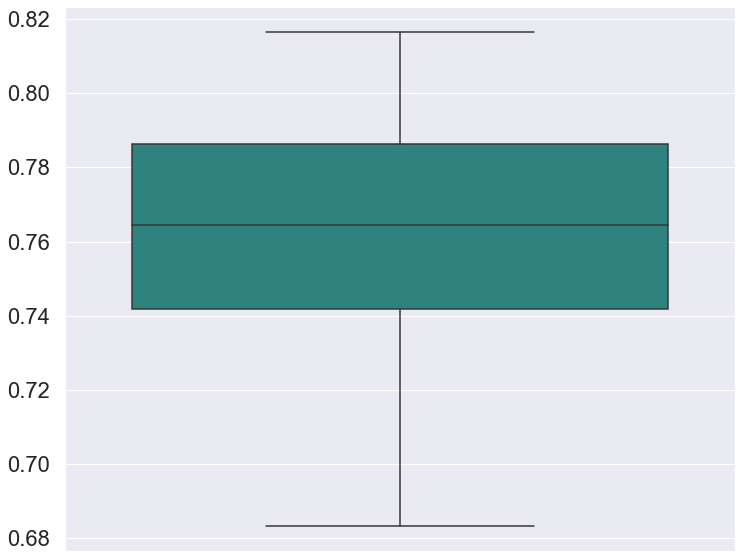

In [232]:
# Generamos las matrices de diseño según la fórmula de modelo completo
y, X = patsy.dmatrices(form, pacientes, return_type='dataframe')

# Obtenemos los resultados de R2 para cada partición tr-tst
scores = cross_val_score(model, X2, y2, cv=cv)

# Sesgo y varianza
print('Coeficioente de detrminación R2 Modelo Final Backward: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

sns.boxplot(y=scores,palette='viridis')

In [233]:
model = LinearRegression()
#model = sm.OLS(y,X)

# Establecemos esquema de validación fijando random_state (reproducibilidad)

cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=12345)

# Obtenemos los resultados de R2 para cada partición tr-tst
scores = cross_val_score(model, X, y, cv=cv) 

# Sesgo y varianza: sacamos media y desv tipica
print('Coeficioente de determinación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Coeficioente de determinación R2: 0.768 (0.031)


<AxesSubplot:>

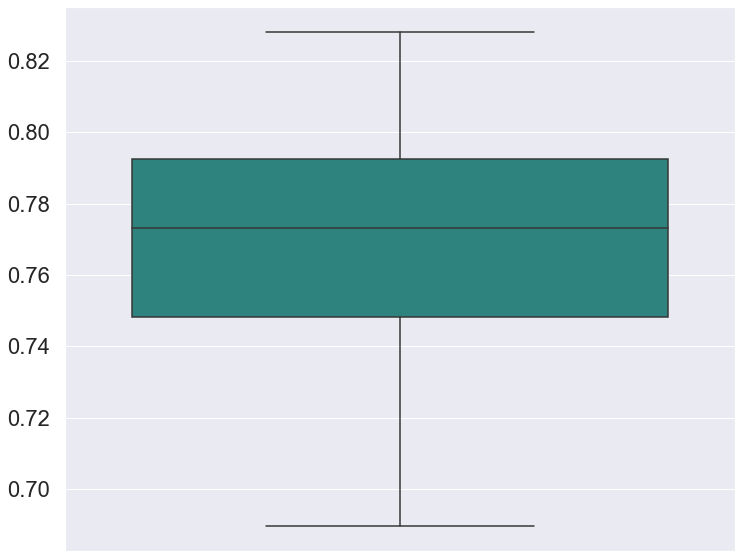

In [234]:
sns.boxplot(y=scores,palette='viridis')

Sesgo-variazna en el caso más desfavorable estoy en un 0,73 aprox y, en el caso mejor estoy en el 0,78. Presenta una mediana de 0,76 aproximadamente. Vamos a extraer la matriz explícita por medio de patsy y luego evaluamos por vc.

En ambos modelos podemos observar como el sesgo es igual de robusto, son bastante similares. No obstante, la mediana es un poco más elevada en el segundo caso. En cuanto a R2 es mejor el segundo. Veamos el modelo con interacción.

In [235]:
import statsmodels.api as sm
import patsy

Coeficioente de detrminación R2 Modelo Final Backward: 0.761 (0.032)


<AxesSubplot:>

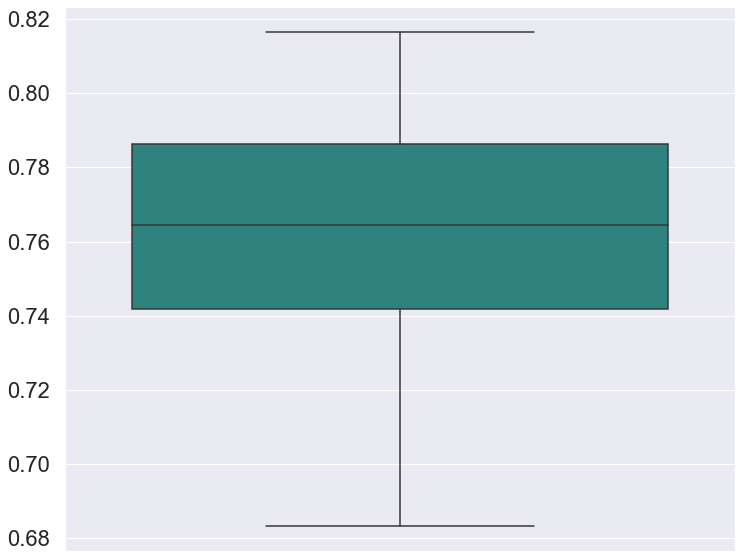

In [236]:
# Generamos las matrices de diseño según la fórmula de modelo completo
y2, X2 = patsy.dmatrices(form2, pacientes, return_type='dataframe')

# Obtenemos los resultados de R2 para cada partición tr-tst
scores = cross_val_score(model, X2, y2, cv=cv)

# Sesgo y varianza
print('Coeficioente de detrminación R2 Modelo Final Backward: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

sns.boxplot(y=scores,palette='viridis')

In [237]:
form3 = 'fev ~ age*height'

modeloC3 = ols(form3,data=data_train).fit()
modeloC3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     622.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.72e-171
Time:                        13:00:48   Log-Likelihood:                -261.65
No. Observations:                 523   AIC:                             531.3
Df Residuals:                     519   BIC:                             548.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4138      0.593     -0.698      0.485      -1.579       0.751
age           -0.4306      0.063     -6.789      0.000      -0.555      -0.306
height         0.0410      0.010      4.013      0.000       0.021       0.061
age:height     0.0077      0.001      7.712      0.000       0.006       0.010
==============================================================================
Omnibus:                       17.104   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.858
Skew:                          -0.053   Prob(JB):                     6.02e-09
Kurtosis:                       4.314   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coeficioente de detrminación R2 Modelo con interacciones: 0.783 (0.033)


<AxesSubplot:>

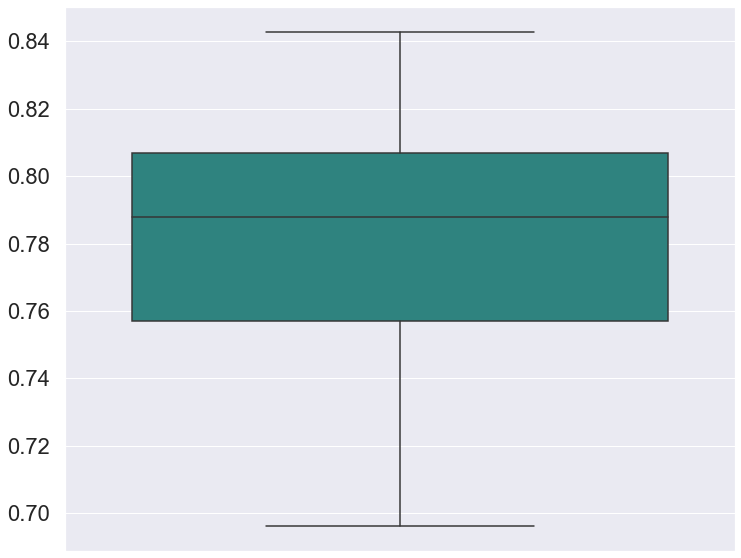

In [238]:
# Generamos las matrices de diseño según la fórmula de modelo completo
y3, X3 = patsy.dmatrices(form3, pacientes, return_type='dataframe')

# Obtenemos los resultados de R2 para cada partición tr-tst
scores = cross_val_score(model, X3, y3, cv=cv)

# Sesgo y varianza
print('Coeficioente de detrminación R2 Modelo con interacciones: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

sns.boxplot(y=scores,palette='viridis')


Observamos sesgo similar en cuanto a robusted a los anteriores pero este presenta valores extremos más elevados. El modelo con mejor capacidad predictiva es el último modelo, el que tiene interacción entre las dos variables. A pesar de tener 1 parámetro más tan solo tiene 3 y explican el 78,3% de la variabilidad de fev.

##### Comparación con validación cruzada

In [239]:
def cross_val_lin(formula, data, seed=12345):
  
      y, X = patsy.dmatrices(formula, data, return_type='dataframe')
      
      model = LinearRegression()
      
  
      cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)
  

      scores = cross_val_score(model, X, y, cv=cv)
  
 
      print('Modelo: ' + formula)
      print('Coeficiente de determinación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
      
   
      
      return(scores)

In [240]:
#generamos las fórmulas que nos faltaban
form1 = 'fev ~ age+height+sex+smoke'
form2 = 'fev ~ age+height'
form3 = 'fev ~ age*height'
form4 = 'fev ~ age+height+sex'
form5 = 'fev ~ age+height+smoke'

list_form = [form1,form2,form3,form4,form5]
list_form

list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,pacientes, seed=2022),list_form))

results = list_res.T.melt() 
results.columns = ['Modelo','R2'] 
results.head()

Modelo: fev ~ age+height+sex+smoke
Coeficiente de determinación R2: 0.767 (0.030)
Modelo: fev ~ age+height
Coeficiente de determinación R2: 0.760 (0.030)
Modelo: fev ~ age*height
Coeficiente de determinación R2: 0.783 (0.033)
Modelo: fev ~ age+height+sex
Coeficiente de determinación R2: 0.767 (0.029)
Modelo: fev ~ age+height+smoke
Coeficiente de determinación R2: 0.760 (0.032)


,Modelo,R2
0,0,0.786218
1,0,0.711223
2,0,0.817981
3,0,0.743759
4,0,0.767015


<AxesSubplot:xlabel='Modelo', ylabel='R2'>

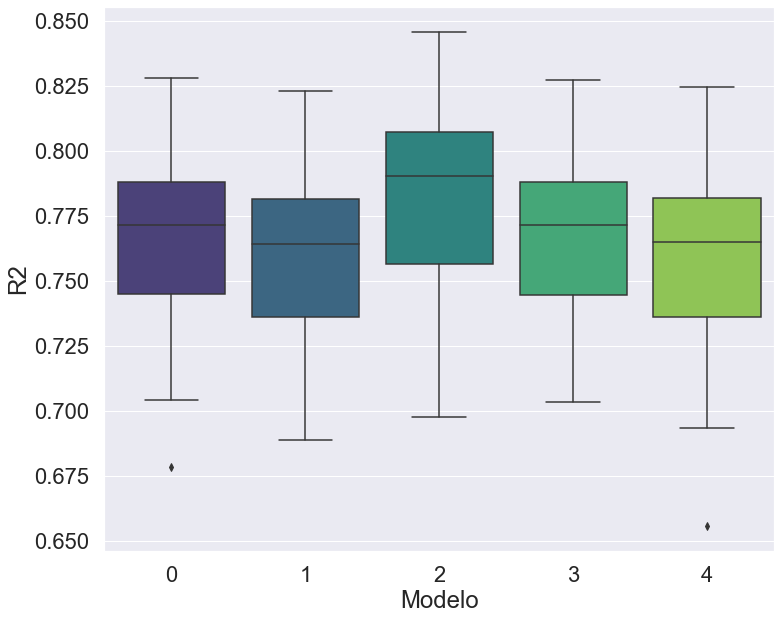

In [241]:
# Boxplot paralelo para comparar
sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis')

Me interesan cajas lo más altas posibles con menor varianza posible. En este caso nos quedamos con el modelo2 del gráfico que sería el que corresponde con el de interacciones: 'fev~height*age'

In [242]:
#Cogemos el data completo porque necesitamos robusted. Aplicamos la form3 que es la que elegimos. 
modelo_final = ols(form3,data=pacientesvar).fit()
modelo_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     814.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.17e-219
Time:                        13:00:51   Log-Likelihood:                -324.07
No. Observations:                 654   AIC:                             656.1
Df Residuals:                     650   BIC:                             674.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6636      0.510     -1.301      0.194      -1.665       0.338
age           -0.4182      0.056     -7.450      0.000      -0.528      -0.308
height         0.0458      0.009      5.244      0.000       0.029       0.063
age:height     0.0075      0.001      8.518      0.000       0.006       0.009
==============================================================================
Omnibus:                       25.962   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.070
Skew:                           0.010   Prob(JB):                     1.00e-15
Kurtosis:                       4.592   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusiones

Se concluye que el 79% de las variaciones en la capacidad pulmonar (fev) pueden ser explicadas por los predictores en el modelo.

La inclusión de la interacción entre edad (age) y altura (height) (age:height) muestra su impacto significativo (coeficiente de 0.0075) en la capacidad pulmonar.

Así mismo, a efecto marginal destacamos: 

1) `Age`:un incremento de 1 año provoca una disminución de 0.4182 unidades en la capacidad pulmonar por cada año de aumento en la edad, manteniendo otras variables constantes con rango de variación esperado -0,528 y -0,308.

2) `Heigh`: Un aumento de 1 unidad en la altura se asocia con un incremento de 0.0458 unidades en la capacidad pulmonar, manteniendo otras variables constantes con rango de variación esperado 0,029 y 0,063.

Todas estas afirmaciones se hacen a constancia de todas las demás variables involucradas en el modelo (CETERIS PARIBUS), es decir, se valora el efecto marginal que tiene cada variable mientras el resto se mantiene constante. 